In [1]:
import numpy as np
import statsmodels.tsa.stattools as stm
import scipy.stats as sc
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans, DBSCAN
import findspark
from pyspark.sql import SparkSession

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [3]:
findspark.init()
spark = SparkSession.builder.appName("Ownership").getOrCreate()

In [4]:
ownership_data = spark.read.csv("../../data/clean_data/clean_car_ownership.csv", header=True, inferSchema=True)
sales_data = spark.read.csv("../../data/clean_data/clean_car_sales.csv", header=True, inferSchema=True)
ownership_data.createOrReplaceTempView("ownership")
sales_data.createOrReplaceTempView("sales")

In [5]:
def sql_to_df(command: str) -> pd.DataFrame:
    return spark.sql(command).toPandas()

In [6]:
ownership_data.show()

+---+------------+------------------+------------+-------------------+--------------+---+------------------+
|_c0|  Occupation|     Annual Income|Credit Score|Years of Employment|Finance Status|Car|Number of Children|
+---+------------+------------------+------------+-------------------+--------------+---+------------------+
|  0|     Teacher|           52800.0|         750|                 10|          Good|Yes|                 2|
|  1|    Engineer| 79199.99999999999|         800|                  8|          Good|Yes|                 1|
|  2|       Nurse|           33000.0|         650|                  5|          Fair| No|                 0|
|  3|      Doctor|          105600.0|         900|                 12|     Excellent|Yes|                 3|
|  4| Businessman|          132000.0|         700|                 15|          Good|Yes|                 2|
|  5|    Engineer|           66000.0|         750|                  6|          Fair| No|                 1|
|  6|     Teacher| 

In [7]:
filtered = sql_to_df('''select Occupation, count(Car) as Ownership_Count, Car from ownership
                        group by Occupation, Car
                        order by Ownership_Count
                     ''')

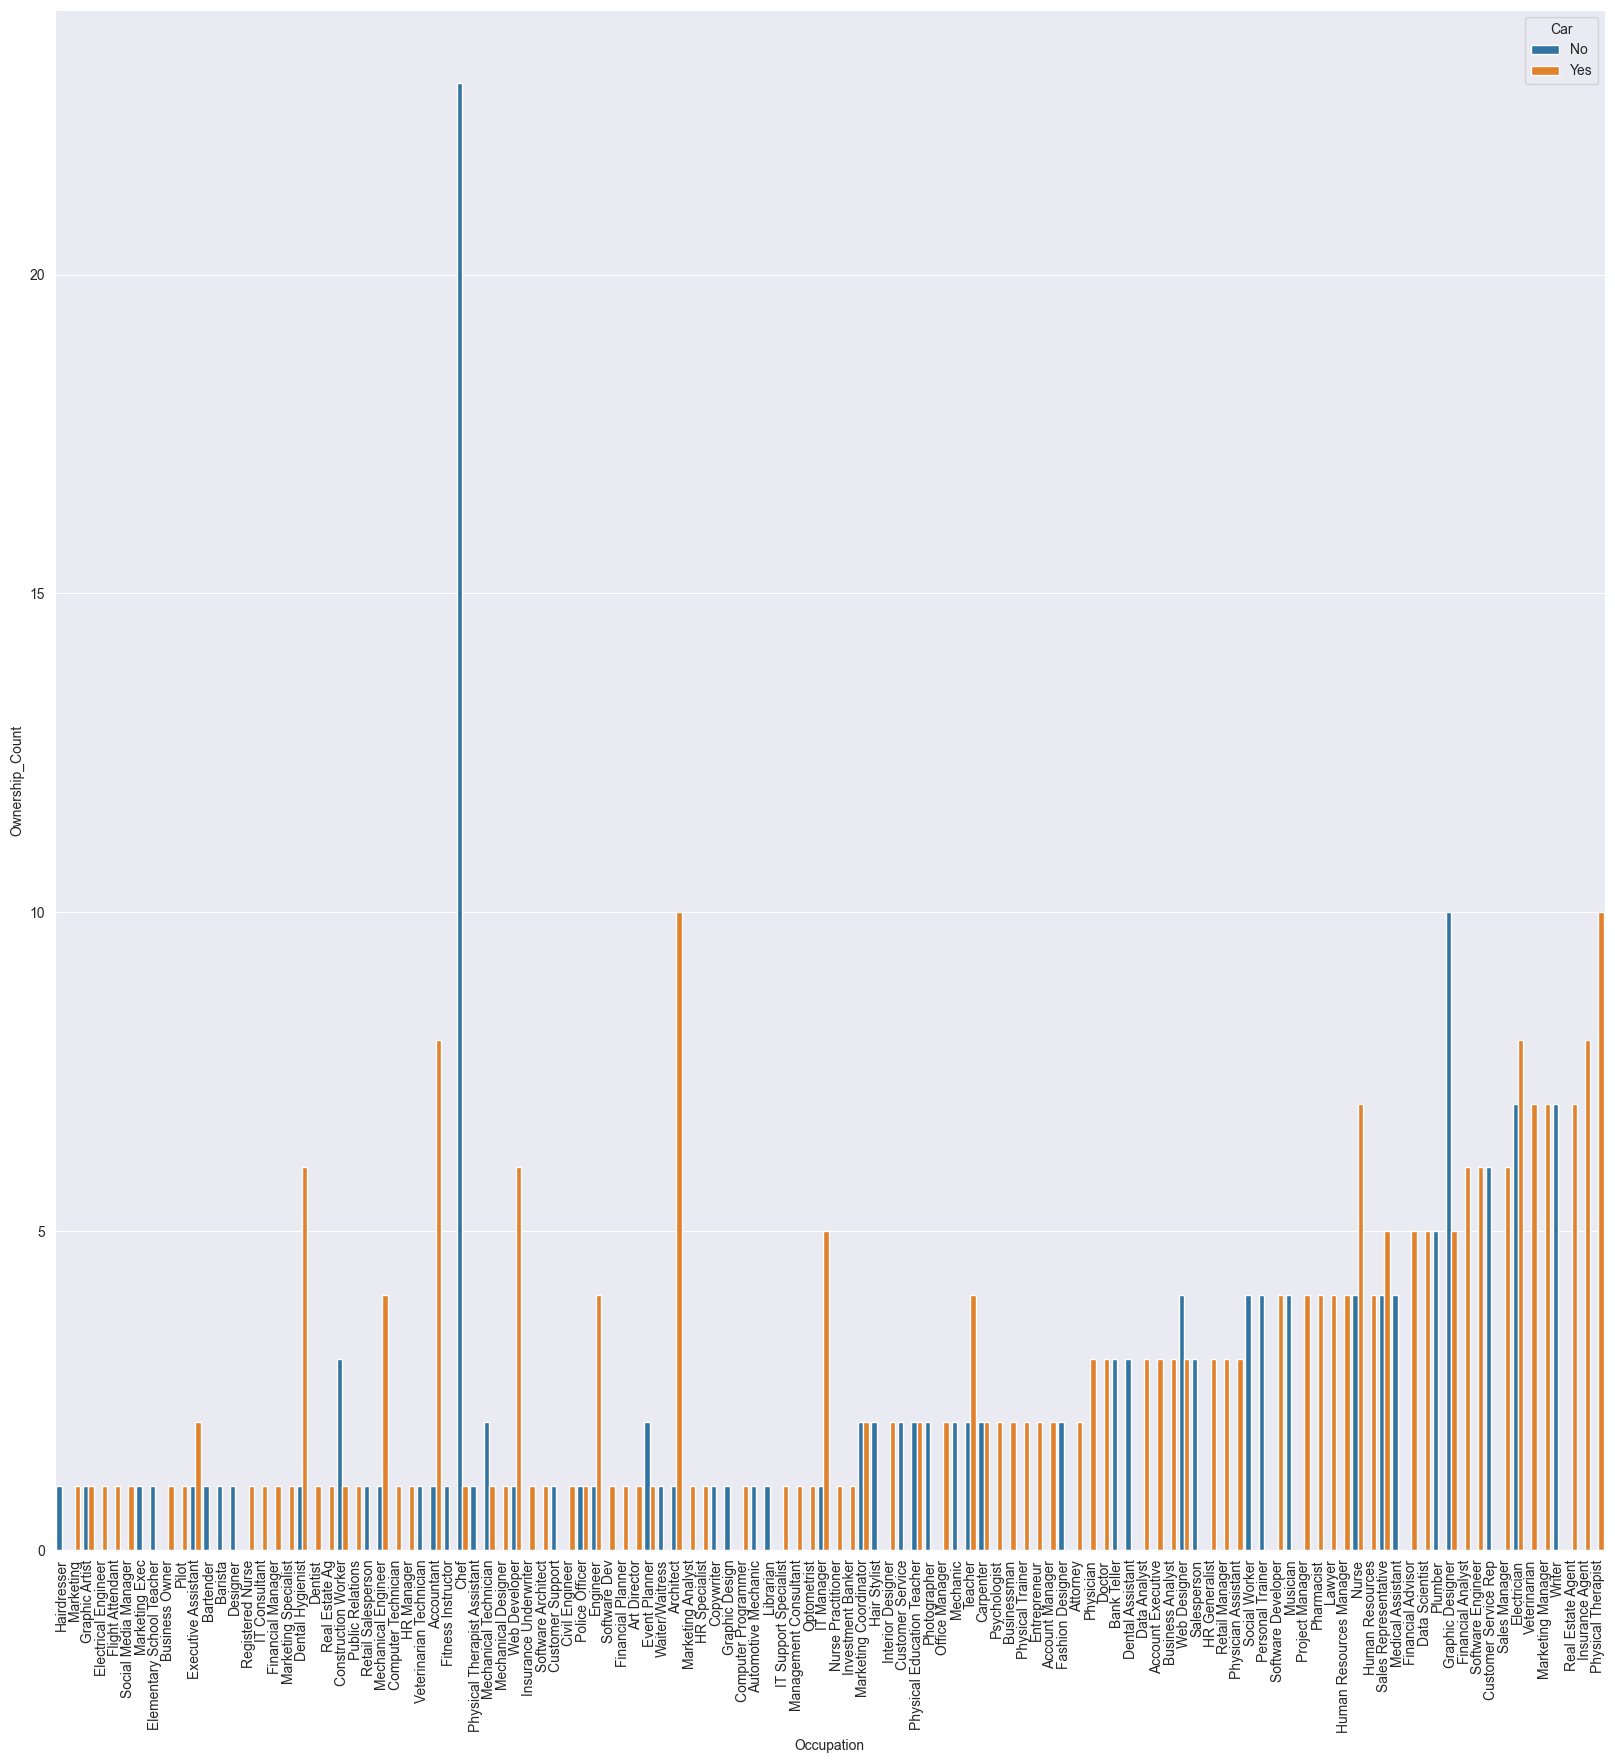

In [8]:
plt.figure(figsize=(20,20))
sb.barplot(data=filtered, x="Occupation", y="Ownership_Count", hue="Car")
plt.xticks(rotation=90)
plt.show()

In [9]:
spark.stop()